In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
provincial = pd.read_csv('provincial_level.csv')

In [137]:
df = pd.read_csv('13100368.csv')


In [138]:
df1 = df[(df['REF_DATE']==2017)&(df['Sex']=='Both sexes')&(df['Birth weight']=='All birth weights')&(df['UOM']=='Rate')][['GEO','VALUE']]

In [139]:
df = pd.read_csv('13100370.csv')

In [140]:
df2 = df[(df['REF_DATE']=='2010/2012')&(df['Sex']=='Both sexes')&(df['Characteristics']=='Health-adjusted life expectancy')&(df['Income group']=='All income groups')&(df['Age group']=='At birth')][['GEO','VALUE']]





In [141]:
df3 = df[(df['REF_DATE']=='2010/2012')&(df['Sex']=='Both sexes')&(df['Characteristics']=='Health-adjusted life expectancy')&(df['Income group']=='All income groups')&(df['Age group']=='At age 65')][['GEO','VALUE']]




In [142]:
df2

,GEO,VALUE
4968,Canada,70.4
5184,Newfoundland and Labrador,68.5
5400,Prince Edward Island,70.1
5616,Nova Scotia,68.2
5832,New Brunswick,69.3
6048,Quebec,71.5
6264,Ontario,70.3
6480,Manitoba,68.4
6696,Saskatchewan,68.7
6912,Alberta,69.3


In [143]:
df1.set_index('GEO',inplace=True)
df1.columns = ['Infant Mortality']
df2.set_index('GEO',inplace=True)
df2.columns = ['Life Expectancy at Birth']
df3.set_index('GEO',inplace=True)
df3.columns = ['Life Expectancy at Age 65']

In [144]:
df_comp = df1.join(df2).join(df3)

In [145]:
df_comp['wait_times'] = [19.8,22.0,39.8,34.4,45.1,15.8,15.7,26.1,15.4,26.1,23.2,np.nan,np.nan,np.nan]

In [146]:
import seaborn as sns

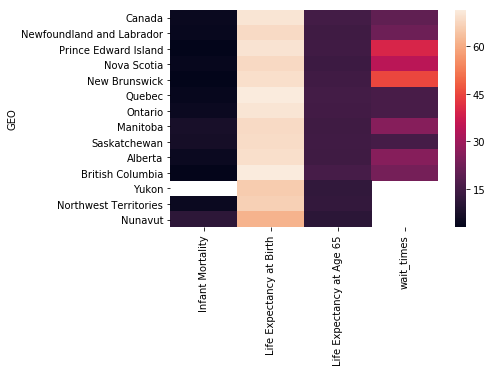

In [147]:
sns.heatmap(df_comp)

In [148]:
from sklearn.preprocessing import MinMaxScaler

In [149]:
scaler = MinMaxScaler()
df_comp[df_comp.columns] = scaler.fit_transform(df_comp)

In [153]:
df_comp_copy = df_comp.copy()

In [154]:
df_comp_copy = df_comp_copy.iloc[1:-3,:]

In [155]:
df_comp_copy

,Infant Mortality,Life Expectancy at Birth,Life Expectancy at Age 65,wait_times
GEO,,,,
Newfoundland and Labrador,0.192771,0.702970,0.70,0.222222
Prince Edward Island,0.024096,0.861386,0.76,0.821549
Nova Scotia,0.156627,0.673267,0.64,0.639731
New Brunswick,0.000000,0.782178,0.80,1.000000
Quebec,0.144578,1.000000,0.88,0.013468
Ontario,0.228916,0.881188,0.84,0.010101
Manitoba,0.530120,0.693069,0.72,0.360269
Saskatchewan,0.457831,0.722772,0.76,0.000000
Alberta,0.253012,0.782178,0.72,0.360269


In [165]:
df_comp_copy = df_comp_copy.sort_values(['Life Expectancy at Birth', 'Life Expectancy at Age 65','wait_times','Infant Mortality'], ascending=[False,False, True,True])

df_comp_copy


,Infant Mortality,Life Expectancy at Birth,Life Expectancy at Age 65,wait_times
GEO,,,,
British Columbia,0.036145,1.000000,1.00,0.262626
Quebec,0.144578,1.000000,0.88,0.013468
Ontario,0.228916,0.881188,0.84,0.010101
Prince Edward Island,0.024096,0.861386,0.76,0.821549
New Brunswick,0.000000,0.782178,0.80,1.000000
Alberta,0.253012,0.782178,0.72,0.360269
Saskatchewan,0.457831,0.722772,0.76,0.000000
Newfoundland and Labrador,0.192771,0.702970,0.70,0.222222
Manitoba,0.530120,0.693069,0.72,0.360269


In [186]:
df_tsne = pd.read_csv('tsne_data.csv')

In [188]:
df_tsne = df_tsne.iloc[:-1,:]

In [189]:
from sklearn.manifold import TSNE

In [191]:
df_tsne

,Province,Population Count,Median Age,Population Density,% of Seniors,Unemployment Rate,prop_aborginal
0,Newfoundland and Labrador,525000,43.4,1.295618,15.0,7.5,7.1
1,Prince Edward Island,144000,41.9,25.441696,15.0,12.6,1.6
2,Nova Scotia,944500,42.7,17.084509,15.2,11.0,3.7
3,New Brunswick,755500,42.8,10.362374,15.1,9.0,3.1
4,Quebec,8007700,40.7,5.192872,14.1,9.5,1.8
5,Ontario,13263500,39.4,12.322149,13.3,7.9,2.4
6,Manitoba,1233700,37.2,1.904455,12.7,7.9,16.7
7,Saskatchewan,1066300,37.0,1.637851,13.4,5.5,15.6
8,Alberta,3790200,35.9,5.726693,10.1,4.9,6.2
9,British Columbia,4499100,41.1,4.762288,14.7,5.4,5.4


In [217]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df_tsne.iloc[:,1:-3])
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [228]:
d = {1:'Newfoundland and Labrador, Prince Edward Island, Nova Scotia, New Brunswick',2:'Quebec',3:'Ontario',4:'Alberta, British Columbia'}

df_tsne['Provinces in Cluster'] = [d[x] for x in df_tsne['cluster_num']]


/Users/bassim/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


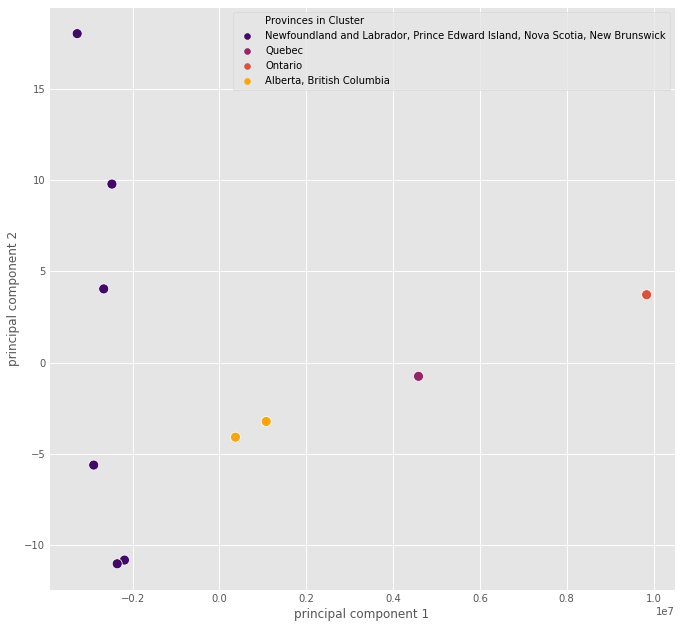

In [230]:
plt.figure(figsize=(10,10))
sns.scatterplot(
    x=principalDf["principal component 1"], y=principalDf["principal component 2"],
    palette='inferno',
    hue=df_tsne['Provinces in Cluster'],
    s=100
)

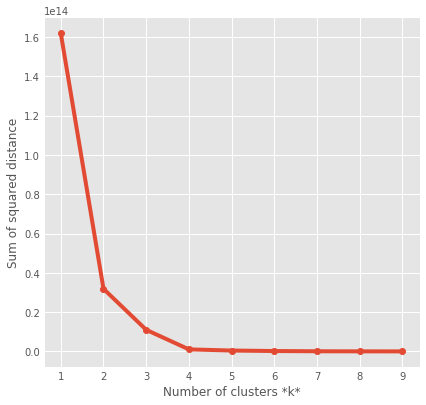

In [233]:
list_k = list(range(1, 10))
sse = []

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(df_tsne.iloc[:,1:-5])
    sse.append(km.inertia_)

# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance');

In [200]:
km = KMeans(n_clusters=4)
km.fit(df_tsne.iloc[:,1:])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [202]:
df_tsne['cluster_num'] = [x+1 for x in km.labels_]

/Users/bassim/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [203]:
df_tsne

,Province,Population Count,Median Age,Population Density,% of Seniors,Unemployment Rate,prop_aborginal,tsne-2d-one,tsne-2d-two,cluster_num
0,Newfoundland and Labrador,525000,43.4,1.295618,15.0,7.5,7.1,-51.531681,2.285997,1
1,Prince Edward Island,144000,41.9,25.441696,15.0,12.6,1.6,33.377209,-43.326256,1
2,Nova Scotia,944500,42.7,17.084509,15.2,11.0,3.7,-82.557465,-20.030706,1
3,New Brunswick,755500,42.8,10.362374,15.1,9.0,3.1,-10.103063,-24.806114,1
4,Quebec,8007700,40.7,5.192872,14.1,9.5,1.8,-50.158733,-10.992253,2
5,Ontario,13263500,39.4,12.322149,13.3,7.9,2.4,-15.240063,-10.650352,3
6,Manitoba,1233700,37.2,1.904455,12.7,7.9,16.7,-48.113655,-20.314690,1
7,Saskatchewan,1066300,37.0,1.637851,13.4,5.5,15.6,-39.928349,-25.334976,1
8,Alberta,3790200,35.9,5.726693,10.1,4.9,6.2,-177.584900,0.180537,4
9,British Columbia,4499100,41.1,4.762288,14.7,5.4,5.4,-21.851727,-28.776264,4


In [243]:
import itertools
iters = [list(x) for x in list(itertools.permutations([x for x in df_comp_copy.iloc[:,:-1].columns]))]

In [244]:
len(iters)

24

In [246]:
df_comp_copy['wait_times'] = 1 - df_comp_copy['wait_times']
df_comp_copy['Infant Mortality'] = 1 - df_comp_copy['Infant Mortality']



In [247]:
df_comp_copy

,Infant Mortality,Life Expectancy at Birth,Life Expectancy at Age 65,wait_times,rank
GEO,,,,,
British Columbia,0.963855,1.000000,1.00,0.737374,1
Quebec,0.855422,1.000000,0.88,0.986532,2
Ontario,0.771084,0.881188,0.84,0.989899,3
Prince Edward Island,0.975904,0.861386,0.76,0.178451,4
New Brunswick,1.000000,0.782178,0.80,0.000000,5
Alberta,0.746988,0.782178,0.72,0.639731,6
Saskatchewan,0.542169,0.722772,0.76,1.000000,7
Newfoundland and Labrador,0.807229,0.702970,0.70,0.777778,8
Manitoba,0.469880,0.693069,0.72,0.639731,9


In [254]:
df_comp_copy.reset_index(inplace=True)

In [255]:
d2 = {}

for order in iters:
    df_temp = df_comp_copy.iloc[:,:-1].copy()
    df_temp.sort_values(by=order,ascending=False,inplace=True)
    df_temp['rank'] = [x for x in range(1,11)]
    for index, row in df_temp.iterrows():
        if row['GEO'] not in d2.keys():
            d2[row['GEO']] = [row['rank']]
        else:
            d2[row['GEO']].append(row['rank'])
    
    

In [262]:
sns.color_palette()

[(0.8862745098039215, 0.2901960784313726, 0.2),
 (0.20392156862745098, 0.5411764705882353, 0.7411764705882353),
 (0.596078431372549, 0.5568627450980392, 0.8352941176470589),
 (0.4666666666666667, 0.4666666666666667, 0.4666666666666667),
 (0.984313725490196, 0.7568627450980392, 0.3686274509803922),
 (0.5568627450980392, 0.7294117647058823, 0.25882352941176473),
 (1.0, 0.7098039215686275, 0.7215686274509804)]

In [272]:
list_colors = sns.color_palette("bright", 8) + sns.color_palette("pastel", 8)

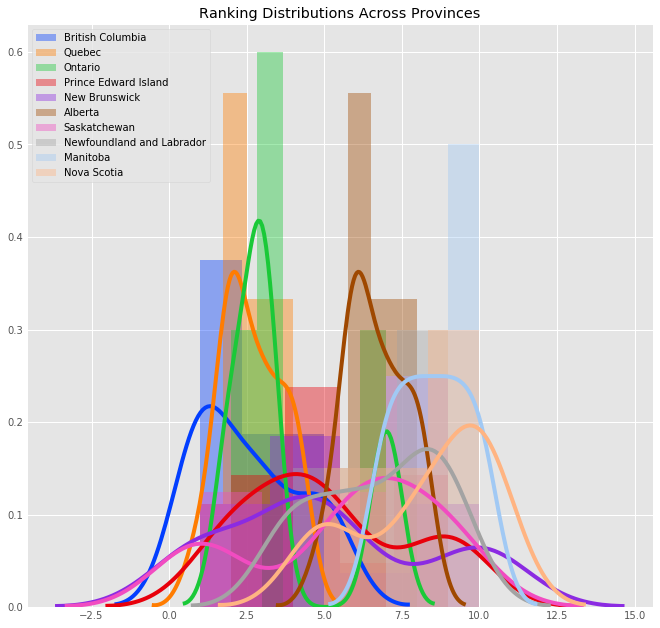

In [273]:
plt.figure(figsize=(10,10))
plt.title('Ranking Distributions Across Provinces')
count = 0
for val in df_comp_copy['GEO']:
    sns.distplot(d2[val],label=val,color=list_colors[count])
    plt.legend()
    count+=1

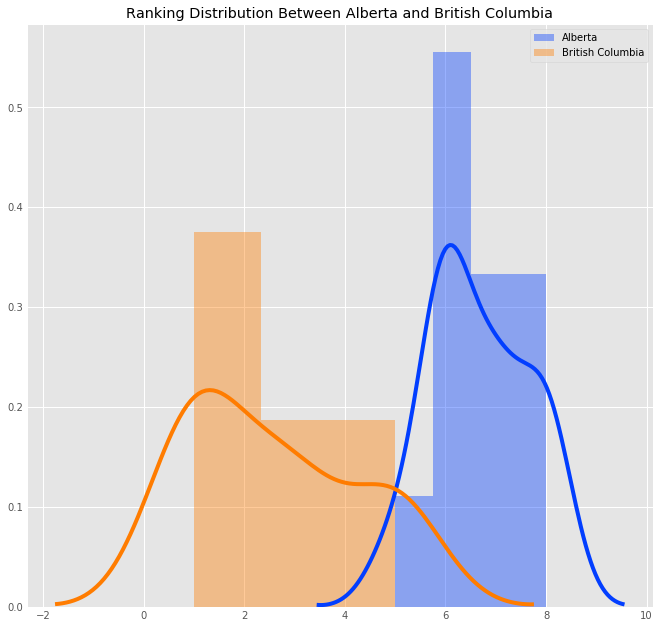

In [276]:
plt.figure(figsize=(10,10))
plt.title('Ranking Distribution Between Alberta and British Columbia')
count = 0
for val in ['Alberta','British Columbia']:
    sns.distplot(d2[val],label=val,color=list_colors[count])
    plt.legend()
    count+=1

In [166]:
df_comp_copy['rank'] = [x for x in range(1,11)]

In [168]:
df_comp_copy

,Infant Mortality,Life Expectancy at Birth,Life Expectancy at Age 65,wait_times,rank
GEO,,,,,
British Columbia,0.036145,1.000000,1.00,0.262626,1
Quebec,0.144578,1.000000,0.88,0.013468,2
Ontario,0.228916,0.881188,0.84,0.010101,3
Prince Edward Island,0.024096,0.861386,0.76,0.821549,4
New Brunswick,0.000000,0.782178,0.80,1.000000,5
Alberta,0.253012,0.782178,0.72,0.360269,6
Saskatchewan,0.457831,0.722772,0.76,0.000000,7
Newfoundland and Labrador,0.192771,0.702970,0.70,0.222222,8
Manitoba,0.530120,0.693069,0.72,0.360269,9


In [185]:
from sklearn.cluster import KMeans


In [ ]:
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(data_subset)

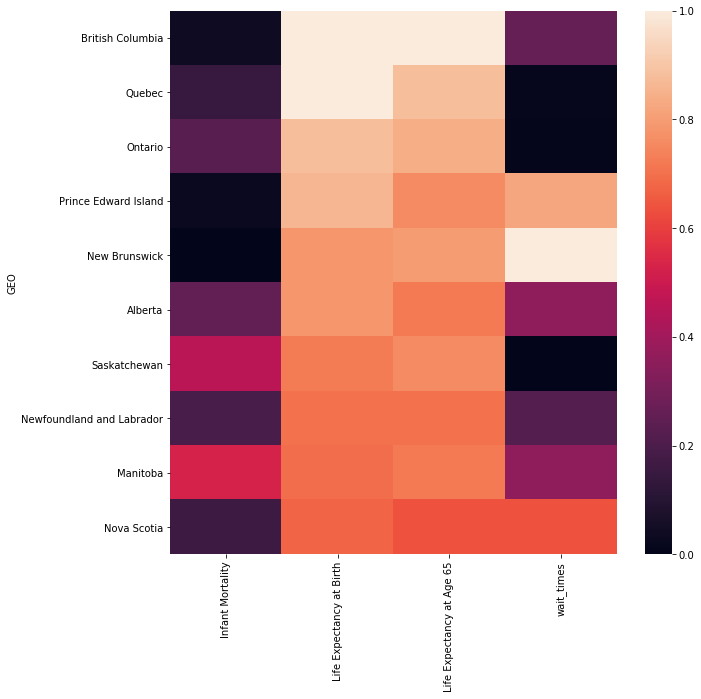

In [173]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
sns.heatmap(df_comp_copy.iloc[:,:-1])
plt.savefig('heatmap_rank.png')

In [167]:
df_comp_copy.to_csv('ranked_provinces.csv')

In [183]:
plt.style.use('ggplot')

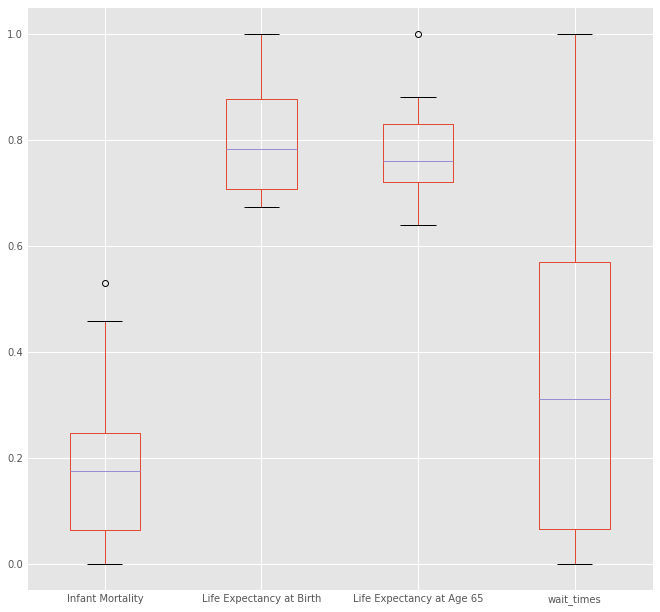

In [184]:
plt.figure(figsize=(10,10))
df_comp_copy.iloc[:,:-1].boxplot()